In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df.drop(columns=['Patient ID', 'Country', 'Hemisphere', 'Continent', 'Heart Attack Risk', 'Income'],axis=1,inplace=True)
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day'],
      dtype='object')

In [ ]:
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,31.251233,286,0,6
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,27.194973,235,1,7
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,28.176571,587,4,4
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,36.464704,378,3,4
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,21.809144,231,1,5


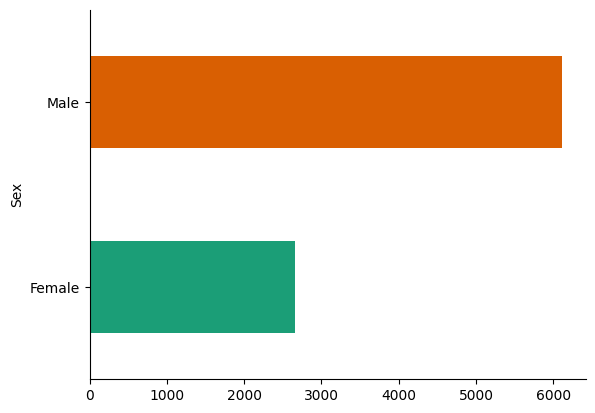

In [ ]:
# @title Sex

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The bar graph shows the frequency based on gender. The count for males is significantky higher as compared to females

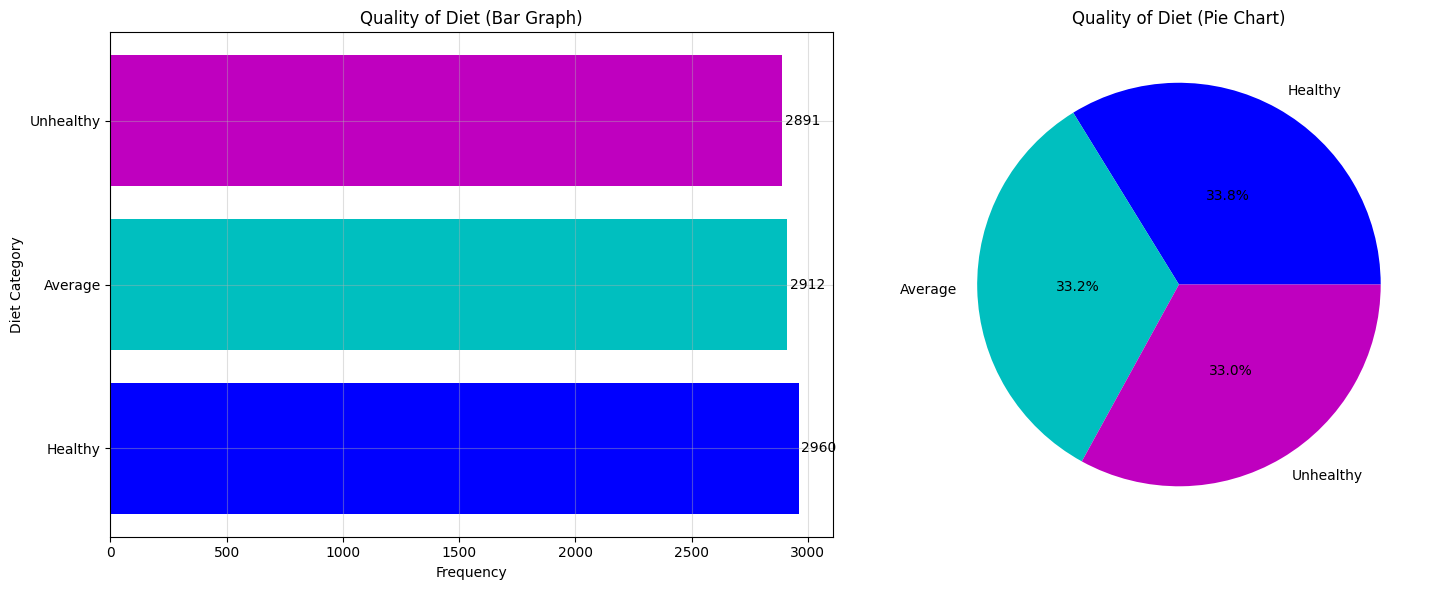

In [ ]:
# Calculate the frequency of each category in the 'Diet' column
diet_counts = df['Diet'].value_counts()

# Create a figure and axes for the plots
figure, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1.2, 1]})

# Bar graph for quality of diet
axes[0].barh(y=diet_counts.index, width=diet_counts.values, color=['b', 'c', 'm', 'red', 'orange', 'g', 'lawngreen', 'mediumseagreen'])
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Diet Category')
axes[0].set_title('Quality of Diet (Bar Graph)')
axes[0].grid(alpha=0.4)

# Display frequency values on the bar graph
for index, value in enumerate(diet_counts):
    axes[0].text(value + 10, index, str(value), va='center')

# Pie chart for quality of diet
axes[1].pie(diet_counts.values, labels=diet_counts.index, colors=['b', 'c', 'm', 'red', 'orange', 'g', 'lawngreen', 'mediumseagreen'], autopct='%1.1f%%', pctdistance=0.5)
axes[1].set_title('Quality of Diet (Pie Chart)')

# Display the plots
plt.tight_layout()
plt.show()

The Bar and pie graph shows almost equal frequency between the 3 groups with healthy being slightly high

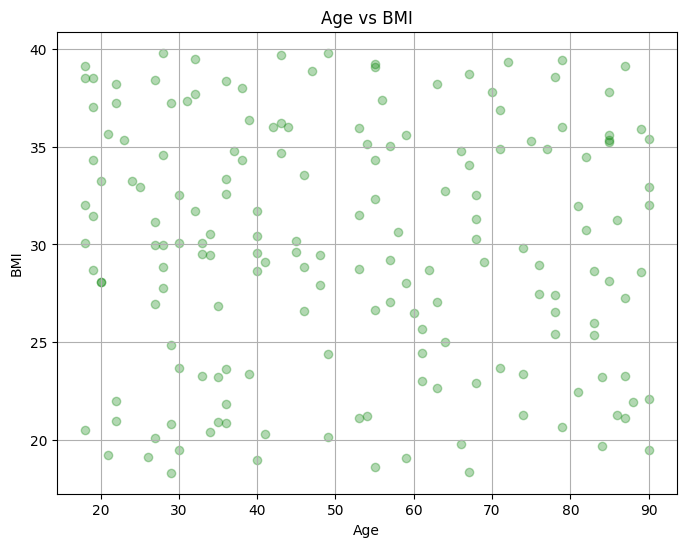

In [ ]:
# Reduce density by subsampling or using aggregation
sampled_df = df.sample(frac=0.02)  # Subsample 2% of the data

plt.figure(figsize=(8, 6))

# Scatter plot for Age vs BMI
plt.scatter(sampled_df['Age'], sampled_df['BMI'], color='green', alpha=0.3)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)

plt.show()


The data points are scattered across the plot without displaying a clear pattern or trend related to age. This indicates that there is no strong linear relationship between age and BMI based on this dataset.

In [ ]:
# Group the data by 'Age' and calculate the mean 'Cholesterol' for each age group
age_mean_cholesterol = df.groupby('Age')['Cholesterol'].mean().reset_index()

# Create a line graph
fig = px.line(age_mean_cholesterol, x='Age', y='Cholesterol', title='Average Cholesterol by Age')
fig.update_xaxes(title='Age')
fig.update_yaxes(title='Average Cholesterol')
fig.show()

This line graph depicts the relationship between age and average cholesterol
levels. The x-axis represents age, ranging from around 20 to 90 years, while the y-axis shows the average cholesterol level.


*   There are distinct peaks in cholesterol levels at certain ages, such as around 35 years old, the late 40s, and again around 75 years old.
*   The highest peak in average cholesterol levels appears to be around the late 40s, suggesting that this age group may be at a higher risk for elevated cholesterol.